## 8. log analysis - weblogdata

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2021.11.16 </div>
<div style="text-align: right\"> Last update: 2021.11.16</div>

- 출처 : https://www.kaggle.com/surya0307/weblogdata

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [3]:
data = pd.read_csv('./data/weblog/weblog.csv')

In [4]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [5]:
data.shape

(16007, 4)

In [6]:
data.drop_duplicates()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
...,...,...,...,...
16002,10.130.2.1,[02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16003,10.130.2.1,[02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200
16004,10.130.2.1,[02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16005,10.130.2.1,[02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200


In [7]:
data.dtypes

IP       object
Time     object
URL      object
Staus    object
dtype: object

time 컬럼 전처리

In [8]:
data['Time'] = data['Time'].map(lambda x : x.lstrip('['))

In [9]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


날짜와 시간 분리하기

In [10]:
data['Time'].str.split(':')

0        [29/Nov/2017, 06, 58, 55]
1        [29/Nov/2017, 06, 59, 02]
2        [29/Nov/2017, 06, 59, 03]
3        [29/Nov/2017, 06, 59, 04]
4        [29/Nov/2017, 06, 59, 06]
                   ...            
16002    [02/Mar/2018, 15, 47, 12]
16003    [02/Mar/2018, 15, 47, 23]
16004    [02/Mar/2018, 15, 47, 32]
16005    [02/Mar/2018, 15, 47, 35]
16006    [02/Mar/2018, 15, 47, 46]
Name: Time, Length: 16007, dtype: object

In [11]:
data['Time'].str.split(':', n=1)

0        [29/Nov/2017, 06:58:55]
1        [29/Nov/2017, 06:59:02]
2        [29/Nov/2017, 06:59:03]
3        [29/Nov/2017, 06:59:04]
4        [29/Nov/2017, 06:59:06]
                  ...           
16002    [02/Mar/2018, 15:47:12]
16003    [02/Mar/2018, 15:47:23]
16004    [02/Mar/2018, 15:47:32]
16005    [02/Mar/2018, 15:47:35]
16006    [02/Mar/2018, 15:47:46]
Name: Time, Length: 16007, dtype: object

In [12]:
data['Time'].str.split(':', n=1, expand= True)

,0,1
0,29/Nov/2017,06:58:55
1,29/Nov/2017,06:59:02
2,29/Nov/2017,06:59:03
3,29/Nov/2017,06:59:04
4,29/Nov/2017,06:59:06
...,...,...
16002,02/Mar/2018,15:47:12
16003,02/Mar/2018,15:47:23
16004,02/Mar/2018,15:47:32
16005,02/Mar/2018,15:47:35


In [13]:
data['Time'] = data['Time'].str.split(':',n = 1, expand = True)

ValueError: Columns must be same length as key

In [14]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [15]:
data['Time'] = pd.to_datetime(data['Time'],format='%d%m%Y', errors='ignore')

In [16]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [17]:
data = data.rename(columns={'Staus': 'Status'}, index={'ONE': 'one'}) ##??

In [18]:
data['URL']=data['URL'].map(lambda x: x.lstrip('0')) ##??

In [19]:
data.head()

,IP,Time,URL,Status
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16007 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IP      16007 non-null  object
 1   Time    16007 non-null  object
 2   URL     16007 non-null  object
 3   Status  16007 non-null  object
dtypes: object(4)
memory usage: 625.3+ KB


In [21]:
data.describe()

,IP,Time,URL,Status
count,16007,16007,16007,16007
unique,16,7307,314,13
top,10.128.2.1,cannot,GET /login.php HTTP/1.1,200
freq,4257,167,3284,11330


In [22]:
data.isnull().sum()

IP        0
Time      0
URL       0
Status    0
dtype: int64

피처 생성하기

In [23]:
# converting the date_time into datetime format

data['month'] = data['Time'].str.slice(3, 6)
data['day'] = data['Time'].str.slice(0, 2) 

In [24]:
data.head()

,IP,Time,URL,Status,month,day
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov,29
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov,29
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov,29
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29


In [25]:
data['month'].unique()

array(['Nov', 'not', '', 'e', 'Dec', 'n.c', 'IND', 'Jan', 'Feb', 'Mar'],
      dtype=object)

feature 추가

In [26]:
data['Methods'] = data['URL'].str.split('/').str[0]

In [27]:
data.head()

,IP,Time,URL,Status,month,day,Methods
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov,29,GET
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov,29,POST
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov,29,GET
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET


In [28]:
data['Methods'].value_counts()

GET             15098
POST              682
'error.txt':       64
'*.o':             62
'a.out':           41
HEAD                9
52:06.9             5
48:37.1             5
12:58.7             5
2:49.8              5
29:09.2             5
24:12.8             5
command             5
main():             4
not                 2
1243                1
1226                1
44:47.7             1
:53.4               1
1192                1
848                 1
451                 1
40:28.7             1
20:28.3             1
51:47.0             1
Name: Methods, dtype: int64

In [29]:
#   data['URL_new'] = data['URL'].str.split('/').str[3]
if data['URL'].str.contains('.php').any():
    data['URL_new'] = data['URL'].str.split('/').str[1]
elif data['URL'].str.contains('.js').any():
    data['URL_new'] = data['URL'].str.split('/').str[3]

In [30]:
data.head()

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov,29,GET,login.php HTTP
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov,29,POST,process.php HTTP
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov,29,GET,home.php HTTP
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,js
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,bootstrap-3.3.7


In [31]:
data['URL_new'] = data['URL_new'].str.split('HTTP')

In [32]:
data.head()

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov,29,GET,"[login.php , ]"
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov,29,POST,"[process.php , ]"
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov,29,GET,"[home.php , ]"
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,[js]
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,[bootstrap-3.3.7]


Text(0.5, 1.0, 'Most Popular Methods by the Users')

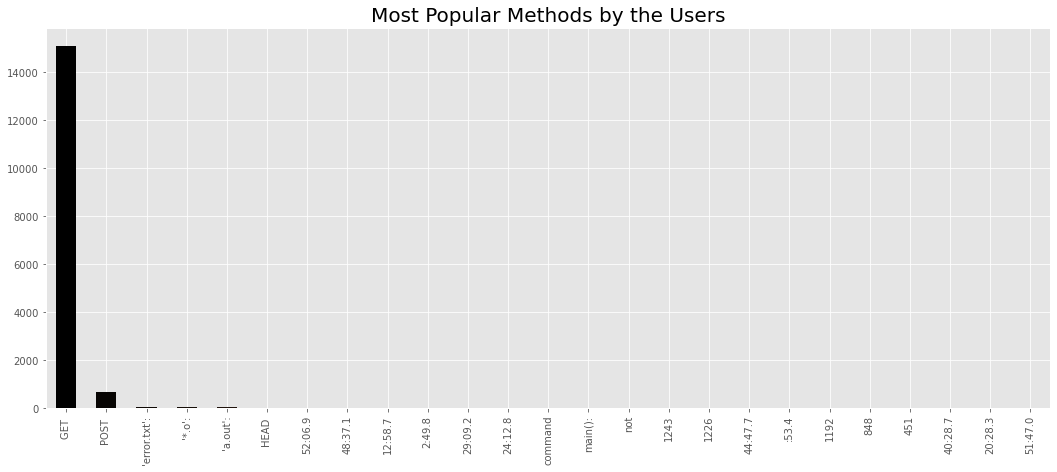

In [33]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['Methods'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Methods by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular URLs by the Users')

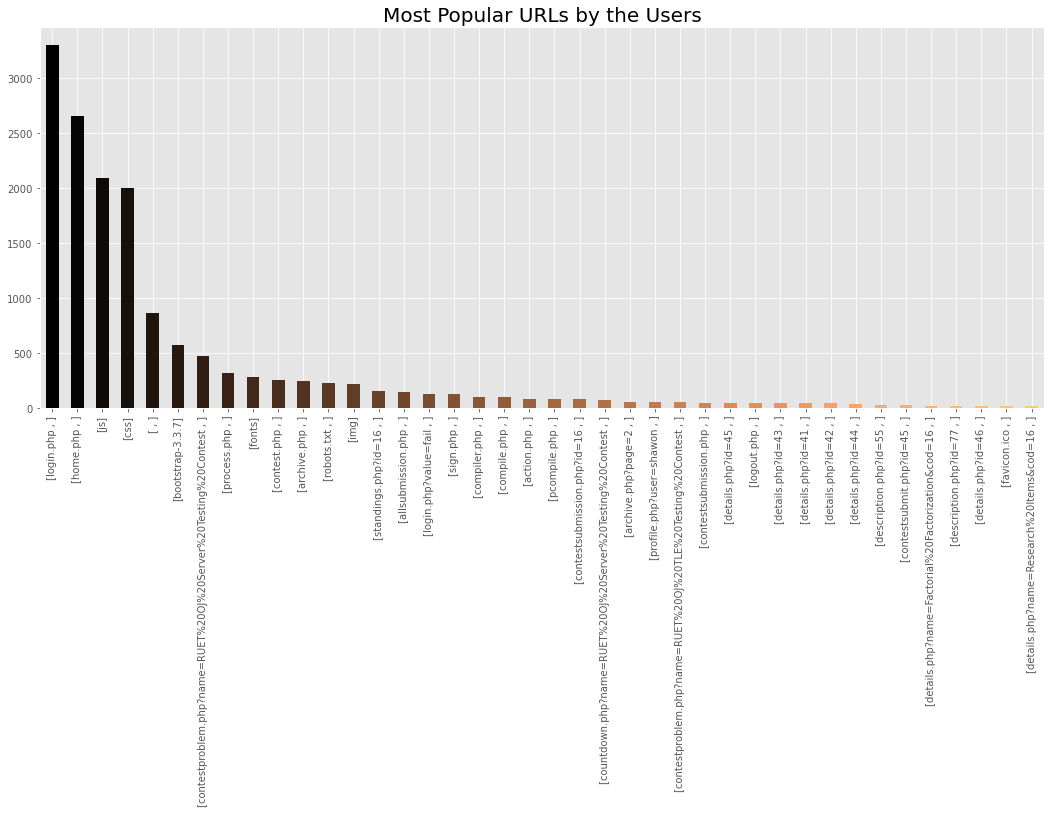

In [34]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['URL_new'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular URLs by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Months of Logins')

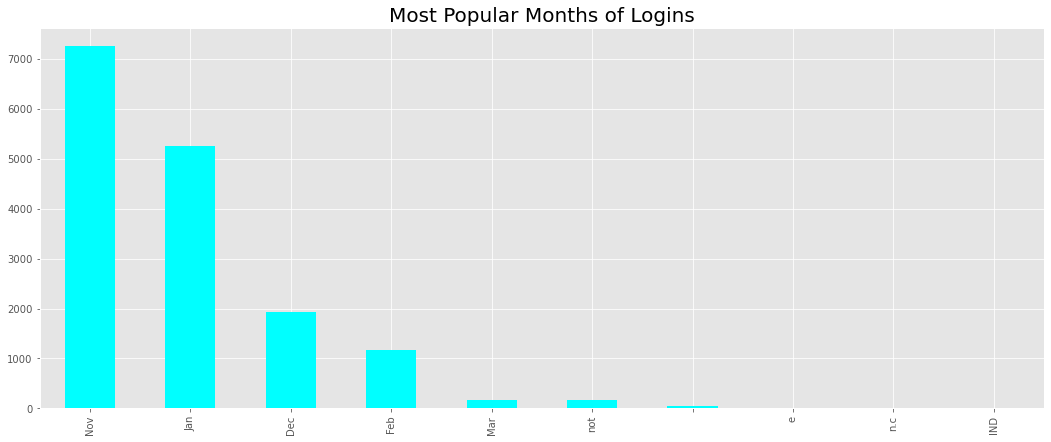

In [35]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['month'].value_counts().head(40).plot.bar(color = 'cyan')
plt.title('Most Popular Months of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Days of Logins')

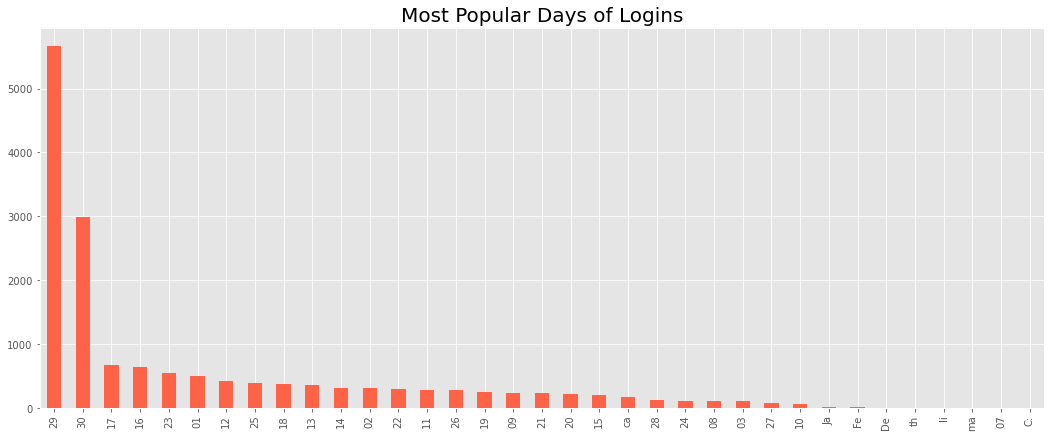

In [36]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['day'].value_counts().head(40).plot.bar(color = 'tomato')
plt.title('Most Popular Days of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular statuses for the Users')

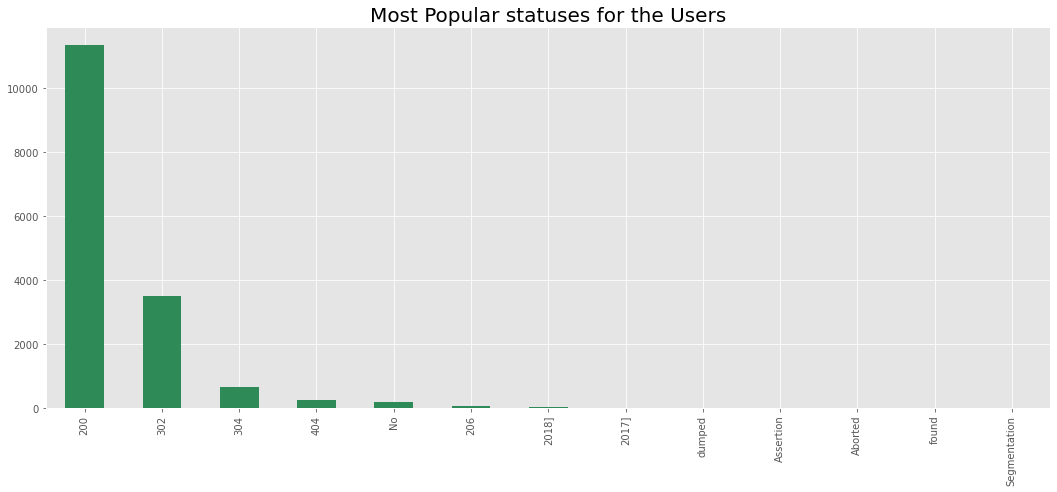

In [37]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
data['Status'].value_counts().head(40).plot.bar(color = 'seagreen')
plt.title('Most Popular statuses for the Users', fontsize = 20)

In [38]:
import plotly.express as px
  
fig = px.bar(data, x="day", y="month", color="month",
            hover_data=['day'], barmode = 'stack',title = "Months to dates")

fig.show()

ModuleNotFoundError: No module named 'plotly'